In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
#importing data
eye_dir='F:/Harshita/Datasets/EngageDisease/Eye'
nose_dir='F:/Harshita/Datasets/EngageDisease/Nose'

In [3]:
#importing tensorflow libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from numpy import argmax

In [4]:
#classes list
data_dir_list = os.listdir(eye_dir)
data_dir_list

['Bulging_Eyes',
 'Cataracts',
 'Crossed_Eyes',
 'Glaucoma',
 'NoDisease',
 'Uveitis']

In [5]:
#obtaining images
img_rows=224
img_cols=224
num_channel=3

num_epoch = 50
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(eye_dir +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(eye_dir +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Bulging_Eyes folder
Getting image from Cataracts folder
Getting image from Crossed_Eyes folder
Getting image from Glaucoma folder
Getting image from NoDisease folder
Getting image from Uveitis folder


In [6]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
# print("number of samples",num_of_samples)
# print("target column before encoding",target_column)

num_classes 6
Shape of image data (412, 224, 224, 3)


In [7]:
#Label ecnoding of classes
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [8]:
#Performing test-train split

from tensorflow.keras.utils import to_categorical
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [9]:
# CNN Model
first_Mod = Sequential()

first_Mod.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
first_Mod.add(Conv2D(64,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

# first_Mod.add(Conv2D(128,(3,3),activation='relu'))
# first_Mod.add(Conv2D(128,(3,3),activation='relu'))
# first_Mod.add(MaxPool2D(pool_size=(2,2)))
# first_Mod.add(Dropout(0.2))

first_Mod.add(Flatten())
first_Mod.add(Dense(128,activation='relu'))
first_Mod.add(Dropout(0.2))
first_Mod.add(Dense(num_classes,activation='softmax'))
first_Mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

first_Mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 128)               99123328  
                                                        

In [10]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Epoch 1/20
9/9 [==============================] - 76s 8s/step - loss: 21.2871 - accuracy: 0.2986 - val_loss: 1.8199 - val_accuracy: 0.1512
Epoch 2/20
9/9 [==============================] - 67s 8s/step - loss: 1.6078 - accuracy: 0.3750 - val_loss: 1.6085 - val_accuracy: 0.2674
Epoch 3/20
9/9 [==============================] - 66s 7s/step - loss: 1.5438 - accuracy: 0.4479 - val_loss: 1.6893 - val_accuracy: 0.3488
Epoch 4/20
9/9 [==============================] - 66s 7s/step - loss: 1.2101 - accuracy: 0.5312 - val_loss: 1.8255 - val_accuracy: 0.3372
Epoch 5/20
9/9 [==============================] - 66s 7s/step - loss: 0.9698 - accuracy: 0.6354 - val_loss: 1.8677 - val_accuracy: 0.3140
Epoch 6/20
9/9 [==============================] - 65s 7s/step - loss: 0.5928 - accuracy: 0.8333 - val_loss: 2.1135 - val_accuracy: 0.3023
Epoch 7/20
9/9 [==============================] - 64s 7s/step - loss: 0.4629 - accuracy: 0.9028 - val_loss: 1.8815 - val_accuracy: 0.3372
Epoch 8/20
9/9 [=================

In [12]:
import tensorflow as tf

In [20]:
test_img_path = 'F:/Harshita/Engage/EngageProj/FaceRecog/static/assets/img/eye.jpg'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0)

predictions = first_Mod.predict(img_array)

predicted_class = data_dir_list[np.argmax(predictions[0])]

In [21]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3822796e-38,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [22]:
predicted_class

'Crossed_Eyes'

In [17]:
from tensorflow.keras.models import load_model
first_Mod.save('eye_disease.h5')

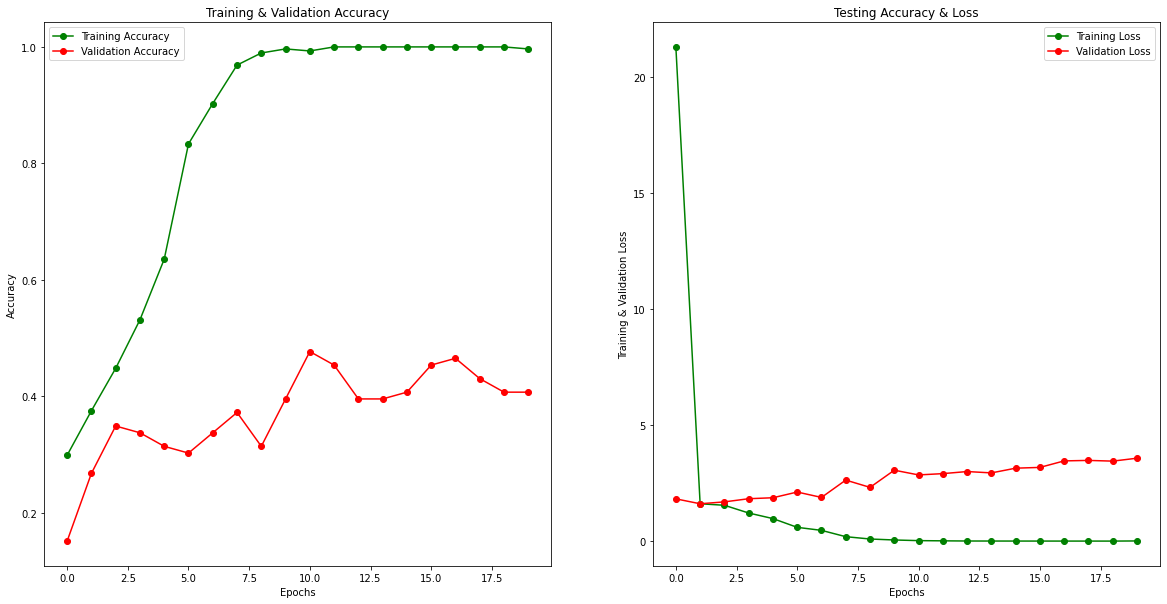

In [19]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()